In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/house prices.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [5]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(df.dtypes.astype(str).value_counts())

object     43
int64      35
float64     3
dtype: int64


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
nullvalue=df.isnull().sum()
perc = 40.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)

In [9]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
obj_df = df.select_dtypes(include=['O']).copy()
obj_df[obj_df.isnull().any(axis=1)]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
17,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Normal
39,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,Gable,CompShg,AsbShng,Plywood,None,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,GasA,TA,N,FuseP,Fa,Typ,NaN,NaN,NaN,NaN,N,WD,AdjLand
48,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,N,New,Partial
78,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Hip,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,N,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
88,C (all),Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,Hip,CompShg,Plywood,Plywood,None,Fa,Fa,CBlock,TA,Fa,No,Unf,Unf,GasA,TA,N,SBrkr,Fa,Typ,NaN,NaN,NaN,NaN,N,ConLD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,Plywood,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1412,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,Gable,CompShg,BrkFace,Stone,None,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,Wall,Fa,N,FuseF,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
1449,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,NaN,NaN,NaN,NaN,Y,WD,Abnorml
1450,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [12]:
# df.fillna(df.mean())

In [8]:
nullvalue=df.isnull().sum()
nullvalue[nullvalue > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
df["MasVnrType"] = df["MasVnrType"].fillna('None')
df["BsmtQual"] = df["BsmtQual"].fillna('None')
df["BsmtCond"] = df["BsmtCond"].fillna('None')
df["BsmtExposure"] = df["BsmtExposure"].fillna('None')
df["BsmtFinType1"] = df["BsmtFinType1"].fillna('None')
df["BsmtFinType2"] = df["BsmtFinType2"].fillna('None')
df["Electrical"] = df["Electrical"].fillna('None')
df["GarageType"] = df["GarageType"].fillna('None')
df["GarageFinish"] = df["GarageFinish"].fillna('None')
df["GarageQual"] = df["GarageQual"].fillna('None')
df["GarageCond"] = df["GarageCond"].fillna('None')

In [10]:

label_encoder = LabelEncoder()
df["MasVnrType"] = label_encoder.fit_transform(df["MasVnrType"])
df["BsmtQual"] = label_encoder.fit_transform(df["BsmtQual"])
df["BsmtCond"] = label_encoder.fit_transform(df["BsmtCond"])
df["BsmtExposure"] = label_encoder.fit_transform(df["BsmtExposure"])
df["BsmtFinType1"] = label_encoder.fit_transform(df["BsmtFinType1"])
df["BsmtFinType2"] = label_encoder.fit_transform(df["BsmtFinType2"])
df["Electrical"] = label_encoder.fit_transform(df["Electrical"])
df["GarageType"] = label_encoder.fit_transform(df["GarageType"])
df["GarageFinish"] = label_encoder.fit_transform(df["GarageFinish"])
df["GarageQual"] = label_encoder.fit_transform(df["GarageQual"])
df["GarageCond"] = label_encoder.fit_transform(df["GarageCond"])



In [11]:
df["LotFrontage"] = label_encoder.fit_transform(df["LotFrontage"])
df["MasVnrArea"] = label_encoder.fit_transform(df["MasVnrArea"])
df["GarageYrBlt"] = label_encoder.fit_transform(df["GarageYrBlt"])


In [12]:

df["GarageYrBlt"].dtype

dtype('int64')

In [18]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,36,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,1,128,Gd,TA,PConc,2,4,3,2,706,6,0,150,856,GasA,Ex,Y,5,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,1,89,2,2,548,5,5,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,51,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,2,0,TA,TA,CBlock,2,4,1,0,978,6,0,284,1262,GasA,Ex,Y,5,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,1,62,2,2,460,5,5,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,39,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,1,104,Gd,TA,PConc,2,4,2,2,486,6,0,434,920,GasA,Ex,Y,5,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,1,87,2,2,608,5,5,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,31,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,2,0,TA,TA,BrkTil,4,1,3,0,216,6,0,540,756,GasA,Gd,Y,5,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,5,84,3,3,642,5,5,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,55,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,1,221,Gd,TA,PConc,2,4,0,2,655,6,0,490,1145,GasA,Ex,Y,5,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,1,86,2,3,836,5,5,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,33,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,2,0,TA,TA,PConc,2,4,3,6,0,6,0,953,953,GasA,Ex,Y,5,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,1,85,2,2,460,5,5,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,56,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,3,72,TA,TA,CBlock,2,4,3,0,790,5,163,589,1542,GasA,TA,Y,5,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,1,64,3,2,500,5,5,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,37,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,2,0,Ex,Gd,Stone,4,1,3,2,275,6,0,877,1152,GasA,Ex,Y,5,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,29,2,1,252,5,5,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,39,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,2,0,TA,TA,CBlock,4,4,2,2,49,5,1029,0,1078,GasA,Gd,Y,0,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,36,3,1,240,5,5,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
nullvalue=df.isnull().sum()
nullvalue[nullvalue > 0]

Series([], dtype: int64)

In [14]:
df["GarageYrBlt"].dtype

dtype('int64')

In [15]:
nominal_features = pd.get_dummies(df, drop_first=True)


In [16]:
nominal_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,36,8450,7,5,2003,2003,1,128,2,4,3,2,706,6,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,8,0,1,89,2,2,548,5,5,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,51,9600,6,8,1976,1976,2,0,2,4,1,0,978,6,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,6,1,1,62,2,2,460,5,5,298,...,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,39,11250,7,5,2001,2002,1,104,2,4,2,2,486,6,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,6,1,1,87,2,2,608,5,5,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,31,9550,7,5,1915,1970,2,0,4,1,3,0,216,6,0,540,756,5,961,756,0,1717,1,0,1,0,3,1,7,1,5,84,3,3,642,5,5,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,55,14260,8,5,2000,2000,1,221,2,4,0,2,655,6,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,9,1,1,86,2,3,836,5,5,192,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,33,7917,6,5,1999,2000,2,0,2,4,3,6,0,6,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,7,1,1,85,2,2,460,5,5,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,1457,20,56,13175,6,6,1978,1988,3,72,2,4,3,0,790,5,163,589,1542,5,2073,0,0,2073,1,0,2,0,3,1,7,2,1,64,3,2,500,5,5,349,...,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,1458,70,37,9042,7,9,1941,2006,2,0,4,1,3,2,275,6,0,877,1152,5,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,29,2,1,252,5,5,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,1459,20,39,9717,5,6,1950,1996,2,0,4,4,2,2,49,5,1029,0,1078,0,1078,0,0,1078,1,0,1,0,2,1,5,0,1,36,3,1,240,5,5,366,...,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
df2 = nominal_features
df2  = df2.fillna(df2.mean())
nullvalue=nominal_features.isnull().sum()
nullvalue.where(nullvalue>0).dropna().astype(int)

Series([], dtype: int64)

In [18]:
from sklearn.model_selection import train_test_split

# train, test = train_test_split(df2, test_size=0.2 , shuffle = True)


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [20]:
df2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,36,8450,7,5,2003,2003,1,128,2,4,3,2,706,6,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,8,0,1,89,2,2,548,5,5,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,51,9600,6,8,1976,1976,2,0,2,4,1,0,978,6,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,6,1,1,62,2,2,460,5,5,298,...,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,39,11250,7,5,2001,2002,1,104,2,4,2,2,486,6,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,6,1,1,87,2,2,608,5,5,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,31,9550,7,5,1915,1970,2,0,4,1,3,0,216,6,0,540,756,5,961,756,0,1717,1,0,1,0,3,1,7,1,5,84,3,3,642,5,5,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,55,14260,8,5,2000,2000,1,221,2,4,0,2,655,6,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,9,1,1,86,2,3,836,5,5,192,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,33,7917,6,5,1999,2000,2,0,2,4,3,6,0,6,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,7,1,1,85,2,2,460,5,5,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,1457,20,56,13175,6,6,1978,1988,3,72,2,4,3,0,790,5,163,589,1542,5,2073,0,0,2073,1,0,2,0,3,1,7,2,1,64,3,2,500,5,5,349,...,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,1458,70,37,9042,7,9,1941,2006,2,0,4,1,3,2,275,6,0,877,1152,5,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,29,2,1,252,5,5,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,1459,20,39,9717,5,6,1950,1996,2,0,4,4,2,2,49,5,1029,0,1078,0,1078,0,0,1078,1,0,1,0,2,1,5,0,1,36,3,1,240,5,5,366,...,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


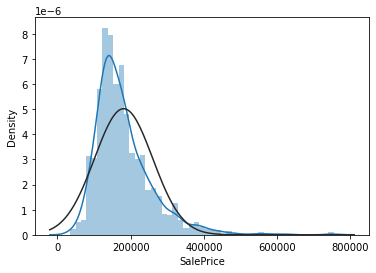

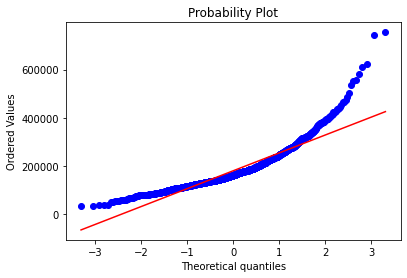

In [21]:
import seaborn as sns
import random as rnd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
#histogram and normal probability plot
df2['SalePrice']
# df['SalePrice']
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [22]:
numeric_features = df2.dtypes[df2.dtypes != 'object'].index
df2[numeric_features] = df2[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df2[numeric_features] = df2[numeric_features].fillna(0)

In [23]:
df2 = pd.get_dummies(df2, dummy_na=True)
df2.shape

(1460, 204)

In [24]:
train, test = train_test_split(df2, test_size=0.2)
train_x = train.drop(['Id','SalePrice'], axis=1)
train_y = train['SalePrice']

test_x = test.drop(['Id','SalePrice'], axis=1)
test_y = test['SalePrice']

In [58]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(202,)),
    Dense(1, kernel_initializer='normal')])
from keras import optimizers
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mse', 'mae' , 'accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                2030      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


In [66]:
trained_model = model.fit(train_x, train_y, batch_size=16, epochs=100, validation_split=0.2) 


Epoch 1/100
59/59 [==============================] - 0s 5ms/step - loss: 0.0422 - mse: 0.0422 - mae: 0.0945 - val_loss: 0.3302 - val_mse: 0.3302 - val_mae: 0.2937
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0416 - mse: 0.0416 - mae: 0.0954 - val_loss: 0.3347 - val_mse: 0.3347 - val_mae: 0.2927
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0407 - mse: 0.0407 - mae: 0.0929 - val_loss: 0.3313 - val_mse: 0.3313 - val_mae: 0.2933
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0409 - mse: 0.0409 - mae: 0.0939 - val_loss: 0.3327 - val_mse: 0.3327 - val_mae: 0.2966
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0396 - mse: 0.0396 - mae: 0.0923 - val_loss: 0.3376 - val_mse: 0.3376 - val_mae: 0.2972
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 0.0394 - mse: 0.0394 - mae: 0.0930 - val_loss: 0.3327 - val_mse: 0.3327 - val_mae: 0.2960
Epoch 7/100
59/59 [===

In [67]:
history = trained_model.history
# history
Y_pred = model.predict(test_x)
y_pred = np.argmax(Y_pred, axis = 1)
mm = model.evaluate(test_x, test_y)
# print("Test Loss", test_loss)
# print("Test Accuracy", test_acc)
print("test loss = "  , mm[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.2235 - mse: 0.2235 - mae: 0.3246
test loss =  0.2234918773174286


In [68]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(202,)),
    Dense(1, kernel_initializer='normal')])

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mse', 'mae'])
model.summary()
trained_model = model.fit(train_x, train_y, batch_size=16, epochs=100, validation_split=0.2) 
history = trained_model.history

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                2030      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
59/59 [==============================] - 1s 7ms/step - loss: 0.9224 - mse: 0.9224 - mae: 0.6928 - val_loss: 1.0515 - val_mse: 1.0515 - val_mae: 0.7188
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.9150 - mse: 0.9150 - mae: 0.6744 - val_loss: 0.9677 - val_mse: 0.9677 - val_mae: 0.6670
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 0.8348 - mse: 0.8348 - mae: 0.6314 - val_loss: 0.8836 - val_mse: 0.8836 - val_mae: 0.6179
Epoch 4/100
59/59 [======

In [69]:
history = trained_model.history
# history
Y_pred = model.predict(test_x)
y_pred = np.argmax(Y_pred, axis = 1)
mm = model.evaluate(test_x, test_y)

print("test Loss = " , mm[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.2599 - mse: 0.2599 - mae: 0.3099
test Loss =  0.25988030433654785


In [70]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(202,)),
    Dense(8, activation='relu'),
    Dense(1, kernel_initializer='normal')])

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mse', 'mae'])
model.summary()
trained_model = model.fit(train_x, train_y, batch_size=16, epochs=100, validation_split=0.2) 
history = trained_model.history

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                2030      
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 2,127
Trainable params: 2,127
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
59/59 [==============================] - 1s 7ms/step - loss: 0.8560 - mse: 0.8560 - mae: 0.6943 - val_loss: 0.7454 - val_mse: 0.7454 - val_mae: 0.5727
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.4497 - mse: 0.4497 - mae: 0.4482 - val_loss: 0.3128 - val_mse: 0.3128 - val_mae: 0.3370
Epoch 3/100
59/59 [==============================] - 0s

In [72]:
history = trained_model.history
# history
Y_pred = model.predict(test_x)
y_pred = np.argmax(Y_pred, axis = 1)
mm = model.evaluate(test_x, test_y)

print("test Loss = " , mm[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.1504 - mse: 0.1504 - mae: 0.2488
test Loss =  0.1503523737192154


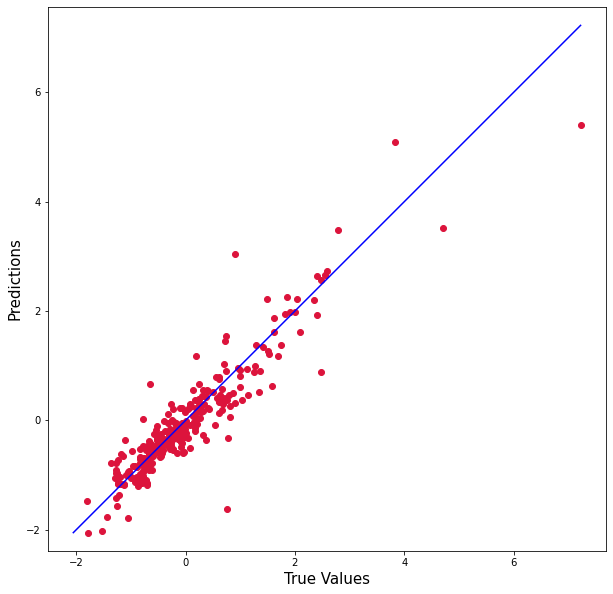

In [36]:
Y_pred = model.predict(test_x)
test_y_list = test_y.to_list()
Y_pred_list = Y_pred.tolist()
# Y_pred_list
ll = []
for i in Y_pred_list:
  for j in i :
    ll.append(j)
len(test_y_list)

plt.figure(figsize=(10,10))
plt.scatter(test_y_list, ll, c='crimson')

p1 = max(max(ll), max(test_y_list))
p2 = min(min(ll), min(test_y_list))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

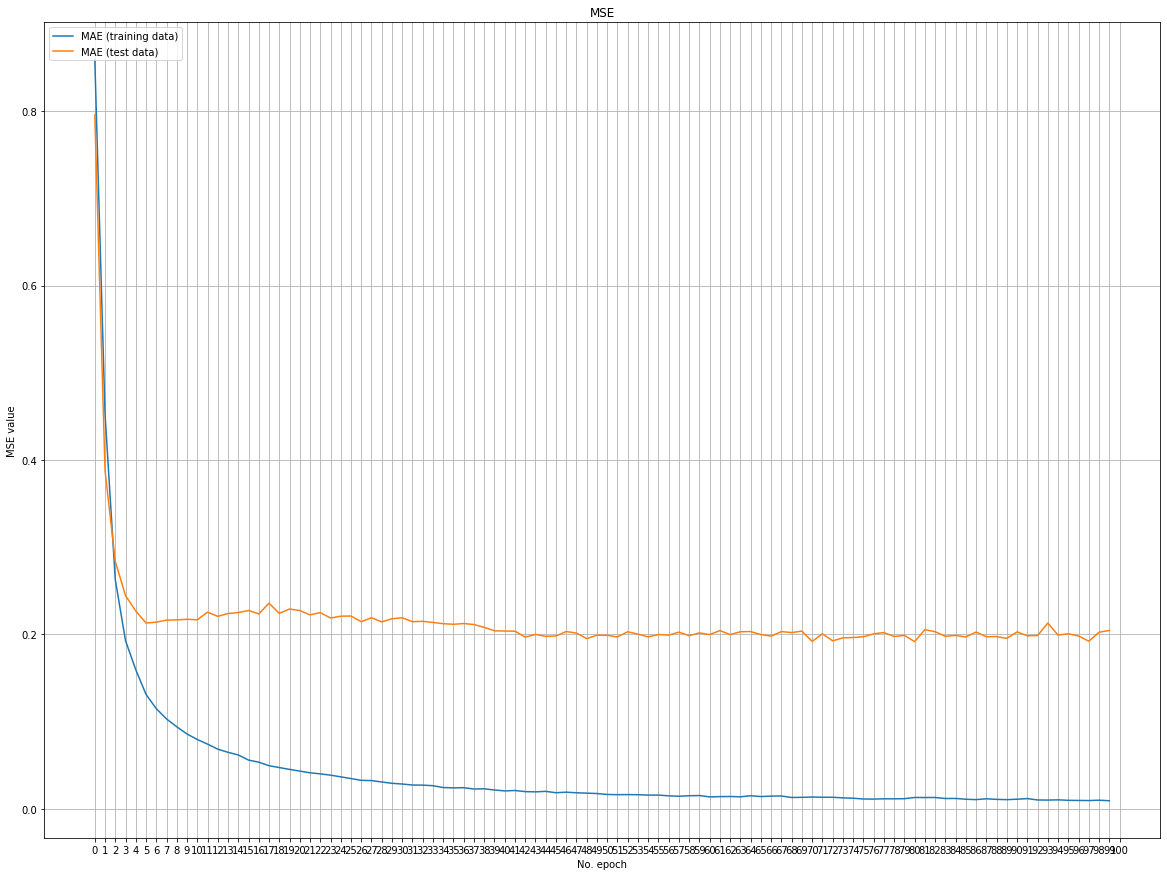

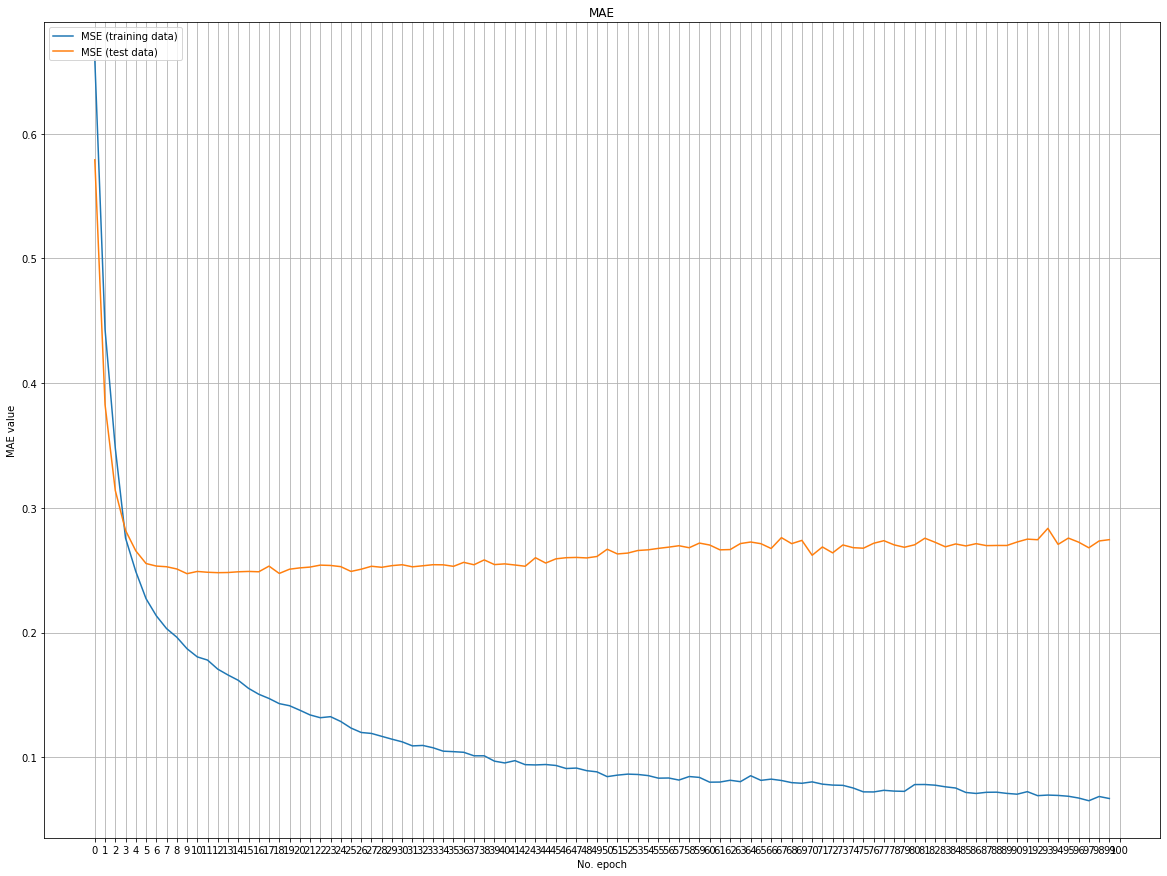

In [37]:
plt.figure(figsize=(20,15))
plt.plot(history['loss'], label='MAE (training data)')
plt.plot(history['val_loss'], label='MAE (test data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.xticks(np.arange(0, len(history['loss'])+1, 1))
plt.legend(loc="upper left")
plt.grid()
plt.show()




plt.figure(figsize=(20,15))
plt.plot(history['mae'], label='MSE (training data)')
plt.xticks(np.arange(0, len(history['mae'])+1, 1))
plt.plot(history['val_mae'], label='MSE (test data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.grid()
plt.show()


In [73]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(202,)),
    Dense(8, activation='softmax'),
    Dense(1, kernel_initializer='normal')])

model.compile(loss='mean_absolute_error', optimizer='adam' ,  metrics = ['mean_squared_error'])
model.summary()
trained_model = model.fit(train_x, train_y, batch_size=16, epochs=100, validation_split=0.2) 
history = trained_model.history

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                2030      
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 2,127
Trainable params: 2,127
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 0.7111 - mean_squared_error: 0.9657 - val_loss: 0.7446 - val_mean_squared_error: 1.1257
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.7155 - mean_squared_error: 0.9811 - val_loss: 0.7345 - val_mean_squared_error: 1.1316
Epoch 3/100
59/59 [==============================] - 0s 3ms

In [74]:
history = trained_model.history
# history
Y_pred = model.predict(test_x)
y_pred = np.argmax(Y_pred, axis = 1)
mm = model.evaluate(test_x, test_y)

print("test Loss = " , mm[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.3304 - mean_squared_error: 0.3273
test Loss =  0.3304474353790283


In [39]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(202,)),
    Dense(8, activation='relu'),
    Dense(1, kernel_initializer='normal')])

model.compile(loss='mean_absolute_error', optimizer='adam' ,  metrics = ['mean_squared_error'])
model.summary()
trained_model = model.fit(train_x, train_y, batch_size=16, epochs=100, validation_split=0.2) 
history = trained_model.history





Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                2030      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 2,127
Trainable params: 2,127
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 0.6460 - mean_squared_error: 0.8174 - val_loss: 0.4859 - val_mean_squared_error: 0.5729
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3686 - mean_squared_error: 0.3402 - val_loss: 0.3147 - val_mean_squared_error: 0.2765
Epoch 3/100
59/59 [==============================] - 0s 3ms/

In [40]:
print(history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


In [41]:
print(history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


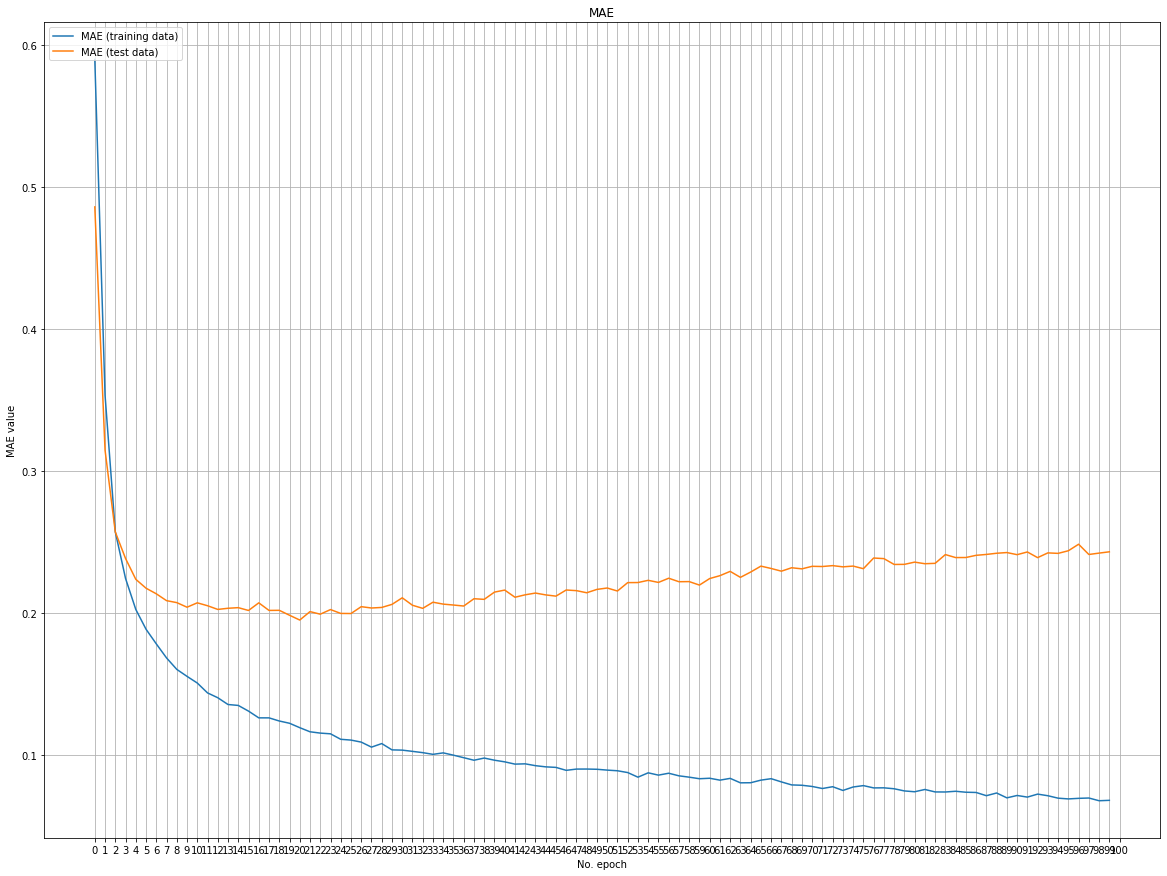

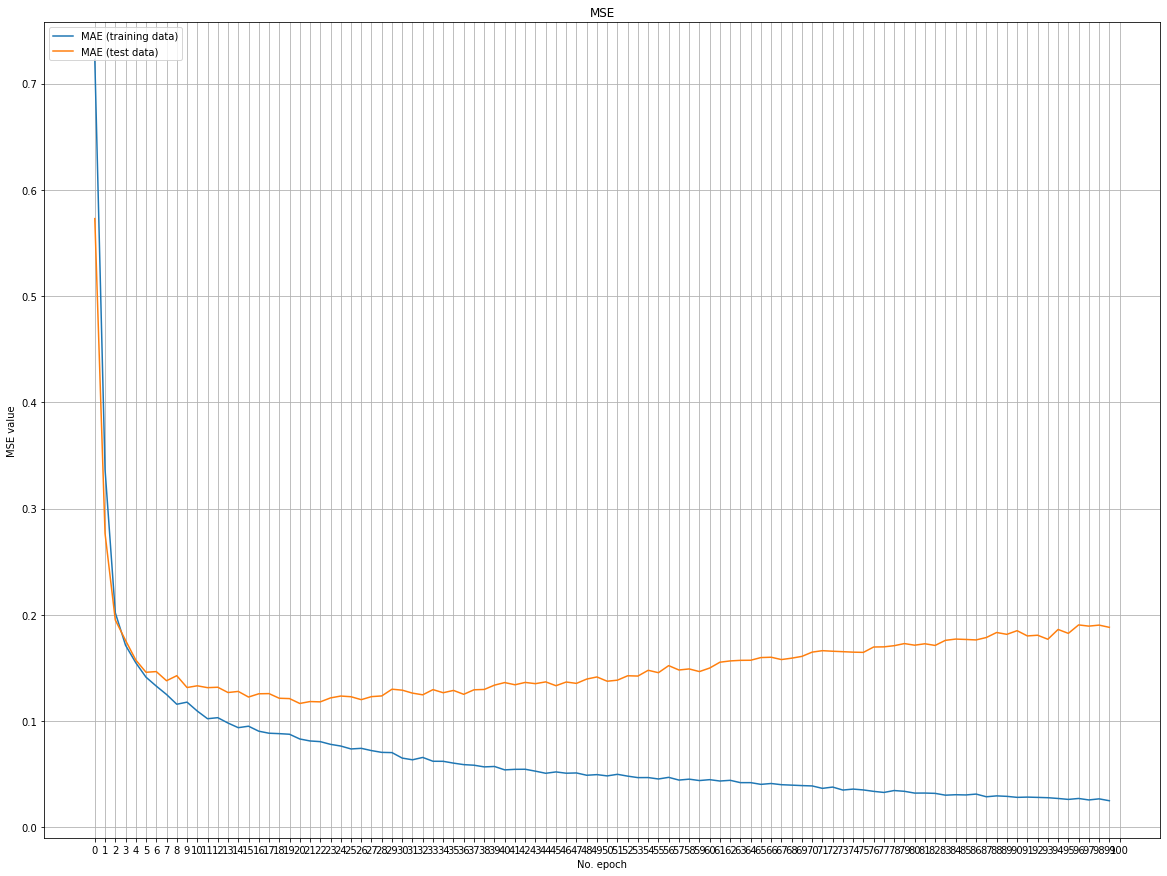

In [42]:

plt.figure(figsize=(20,15))
plt.plot(history['loss'], label='MAE (training data)')
plt.plot(history['val_loss'], label='MAE (test data)')
plt.xticks(np.arange(0, len(history['loss'])+1, 1))
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.grid()
plt.show()

plt.figure(figsize=(20,15))
plt.plot(history['mean_squared_error'], label='MAE (training data)')
plt.plot(history['val_mean_squared_error'], label='MAE (test data)')
plt.title('MSE')
plt.xticks(np.arange(0, len(history['mean_squared_error'])+1, 1))
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [43]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(202,)),
    Dense(8, activation='relu'),
    Dense(1, kernel_initializer='normal')])

model.compile(loss='mean_absolute_error', optimizer='adam' ,  metrics = ['mean_squared_error'])
# model.summary()
trained_model = model.fit(train_x, train_y, batch_size=16, epochs=100, validation_split=0.2) 
history = trained_model.history


Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 0.6822 - mean_squared_error: 0.8697 - val_loss: 0.5475 - val_mean_squared_error: 0.7916
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.4666 - mean_squared_error: 0.5494 - val_loss: 0.3640 - val_mean_squared_error: 0.3841
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3224 - mean_squared_error: 0.3178 - val_loss: 0.2860 - val_mean_squared_error: 0.2369
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 0.2470 - mean_squared_error: 0.1657 - val_loss: 0.2526 - val_mean_squared_error: 0.1992
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 0.2054 - mean_squared_error: 0.1113 - val_loss: 0.2385 - val_mean_squared_error: 0.1808
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 0.2201 - mean_squared_error: 0.1896 - val_loss: 0.2251 - val_mean_squared_error: 0.1590
Epoch 7/100
59/59 [===============

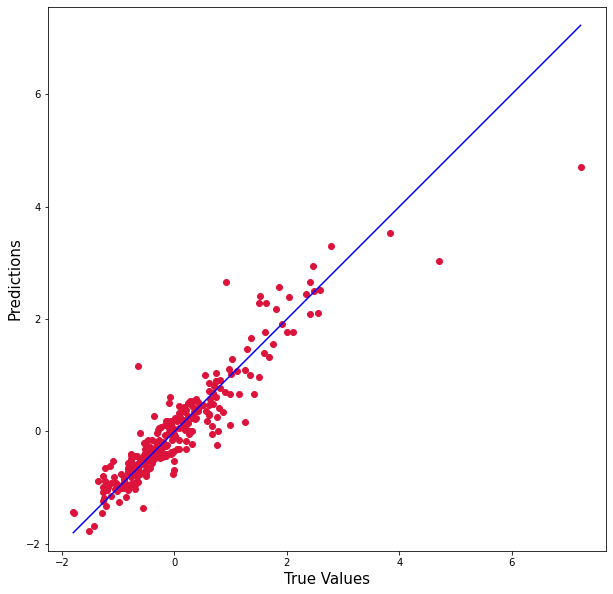

In [44]:
Y_pred = model.predict(test_x)
test_y_list = test_y.to_list()
Y_pred_list = Y_pred.tolist()
# Y_pred_list
ll = []
for i in Y_pred_list:
  for j in i :
    ll.append(j)
len(test_y_list)

plt.figure(figsize=(10,10))
plt.scatter(test_y_list, ll, c='crimson')

p1 = max(max(ll), max(test_y_list))
p2 = min(min(ll), min(test_y_list))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Question 3 - part one

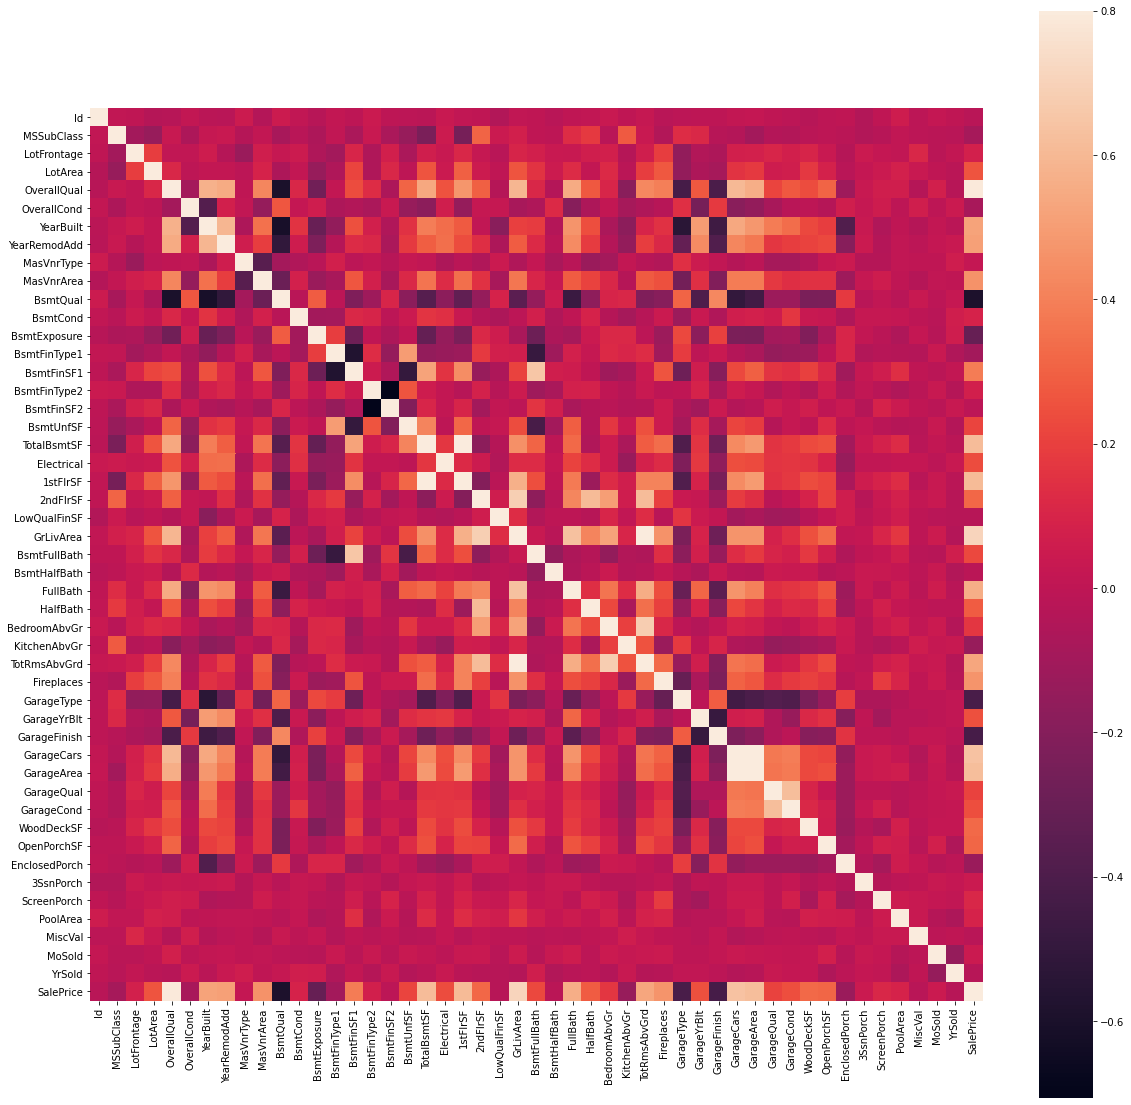

In [45]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

In [46]:
corr_columns=corrmat.columns
for i in corr_columns:
    for j in corr_columns:
        if i == j:
            continue 
        if i == 'SalePrice' or j == 'SalePrice':
            continue
        if (corrmat.loc[i,j] > .5) or (corrmat.loc[i,j] < -.4):
            print(i," Vs ",j,"=",corrmat.loc[i,j])
            print(i," Vs ",'SalePrice',"=",corrmat.loc[i,'SalePrice'])
            print(j," Vs ",'SalePrice',"=",corrmat.loc[j,'SalePrice'])
            print('-'*50)

OverallQual  Vs  YearBuilt = 0.572322768962362
OverallQual  Vs  SalePrice = 0.7909816005838047
YearBuilt  Vs  SalePrice = 0.5228973328794967
--------------------------------------------------
OverallQual  Vs  YearRemodAdd = 0.550683924194174
OverallQual  Vs  SalePrice = 0.7909816005838047
YearRemodAdd  Vs  SalePrice = 0.5071009671113867
--------------------------------------------------
OverallQual  Vs  BsmtQual = -0.5996393106656775
OverallQual  Vs  SalePrice = 0.7909816005838047
BsmtQual  Vs  SalePrice = -0.5937339191038178
--------------------------------------------------
OverallQual  Vs  TotalBsmtSF = 0.5378084986123927
OverallQual  Vs  SalePrice = 0.7909816005838047
TotalBsmtSF  Vs  SalePrice = 0.6135805515591944
--------------------------------------------------
OverallQual  Vs  GrLivArea = 0.5930074300286511
OverallQual  Vs  SalePrice = 0.7909816005838047
GrLivArea  Vs  SalePrice = 0.7086244776126511
--------------------------------------------------
OverallQual  Vs  FullBath =

In [47]:
xx = df2.drop(['Id','SalePrice'], axis=1)
yy = df2['SalePrice']
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xx, yy)

intercept = regressor.intercept_
features = pd.DataFrame(regressor.coef_, xx.columns, columns=['coefficient'])
features.head()
stdevs = []
for i in xx.columns:
    stdev = df2[i].std()
    stdevs.append(stdev)
 
features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]

<BarContainer object of 202 artists>

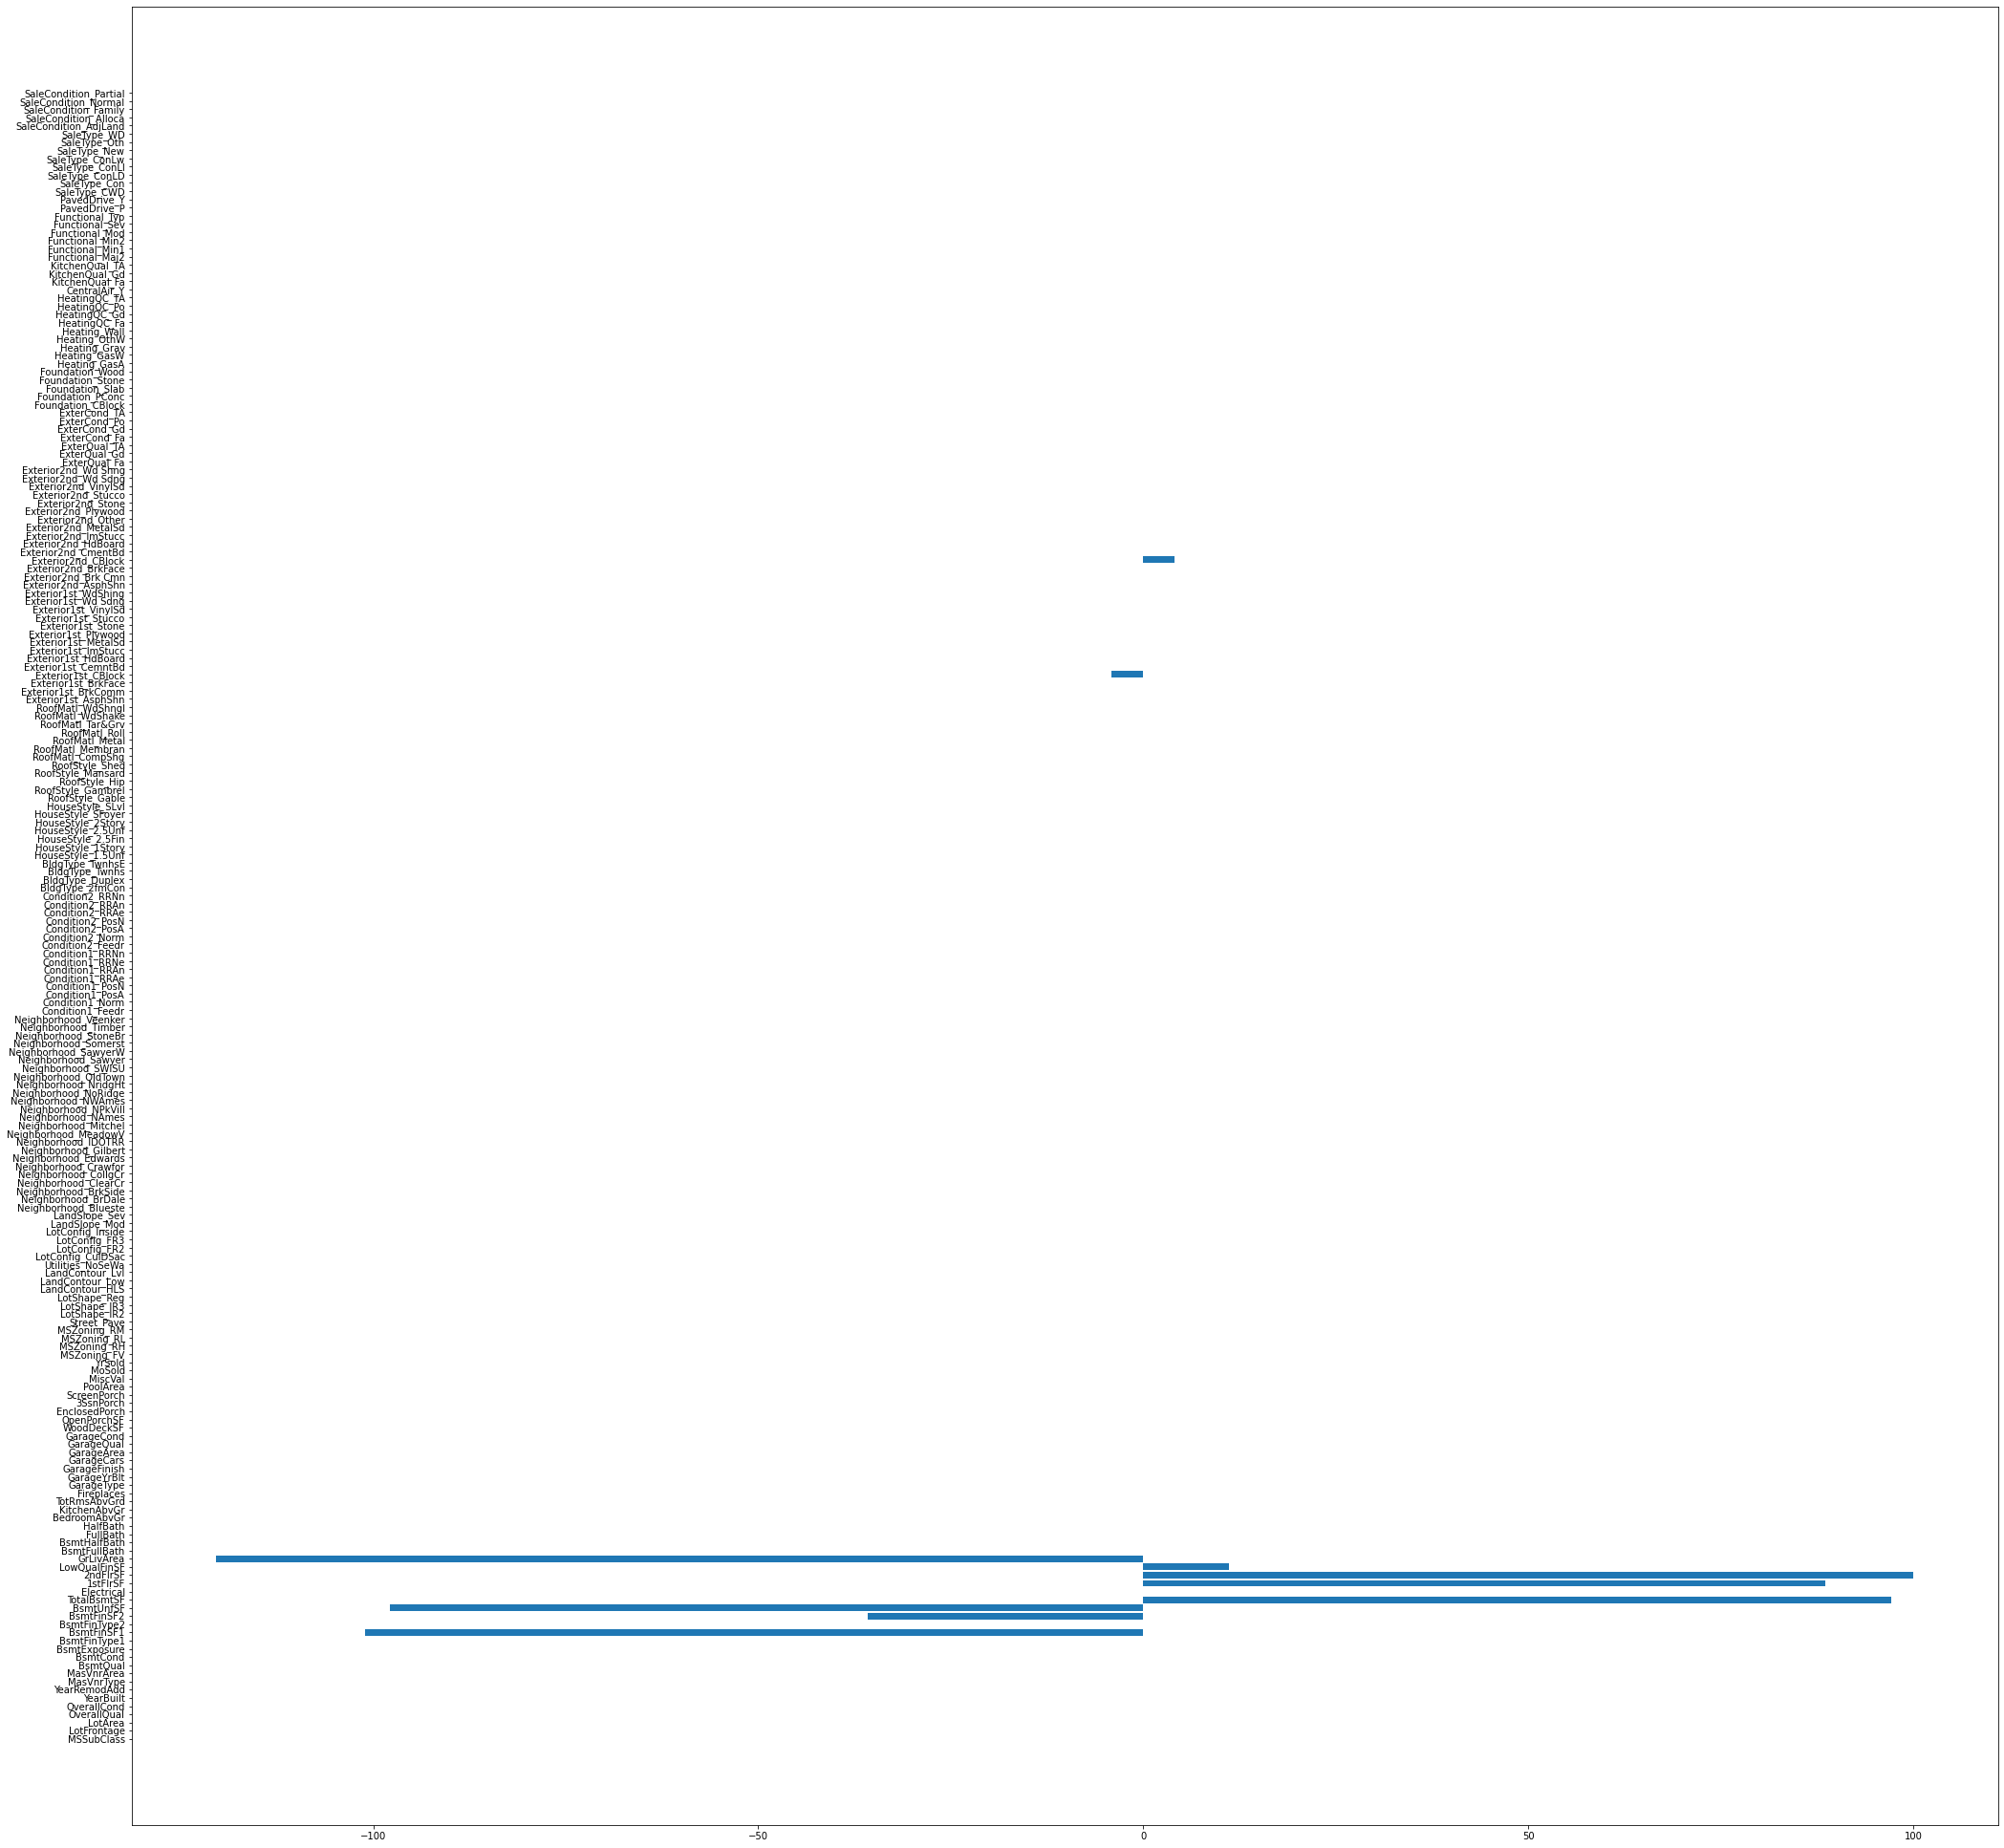

In [48]:
features['importance_normalized'] = 100*features['importance'] / features['importance'].max()
plt.figure(figsize = (35,35))
plt.barh(features.index, features.importance_normalized)

<BarContainer object of 202 artists>

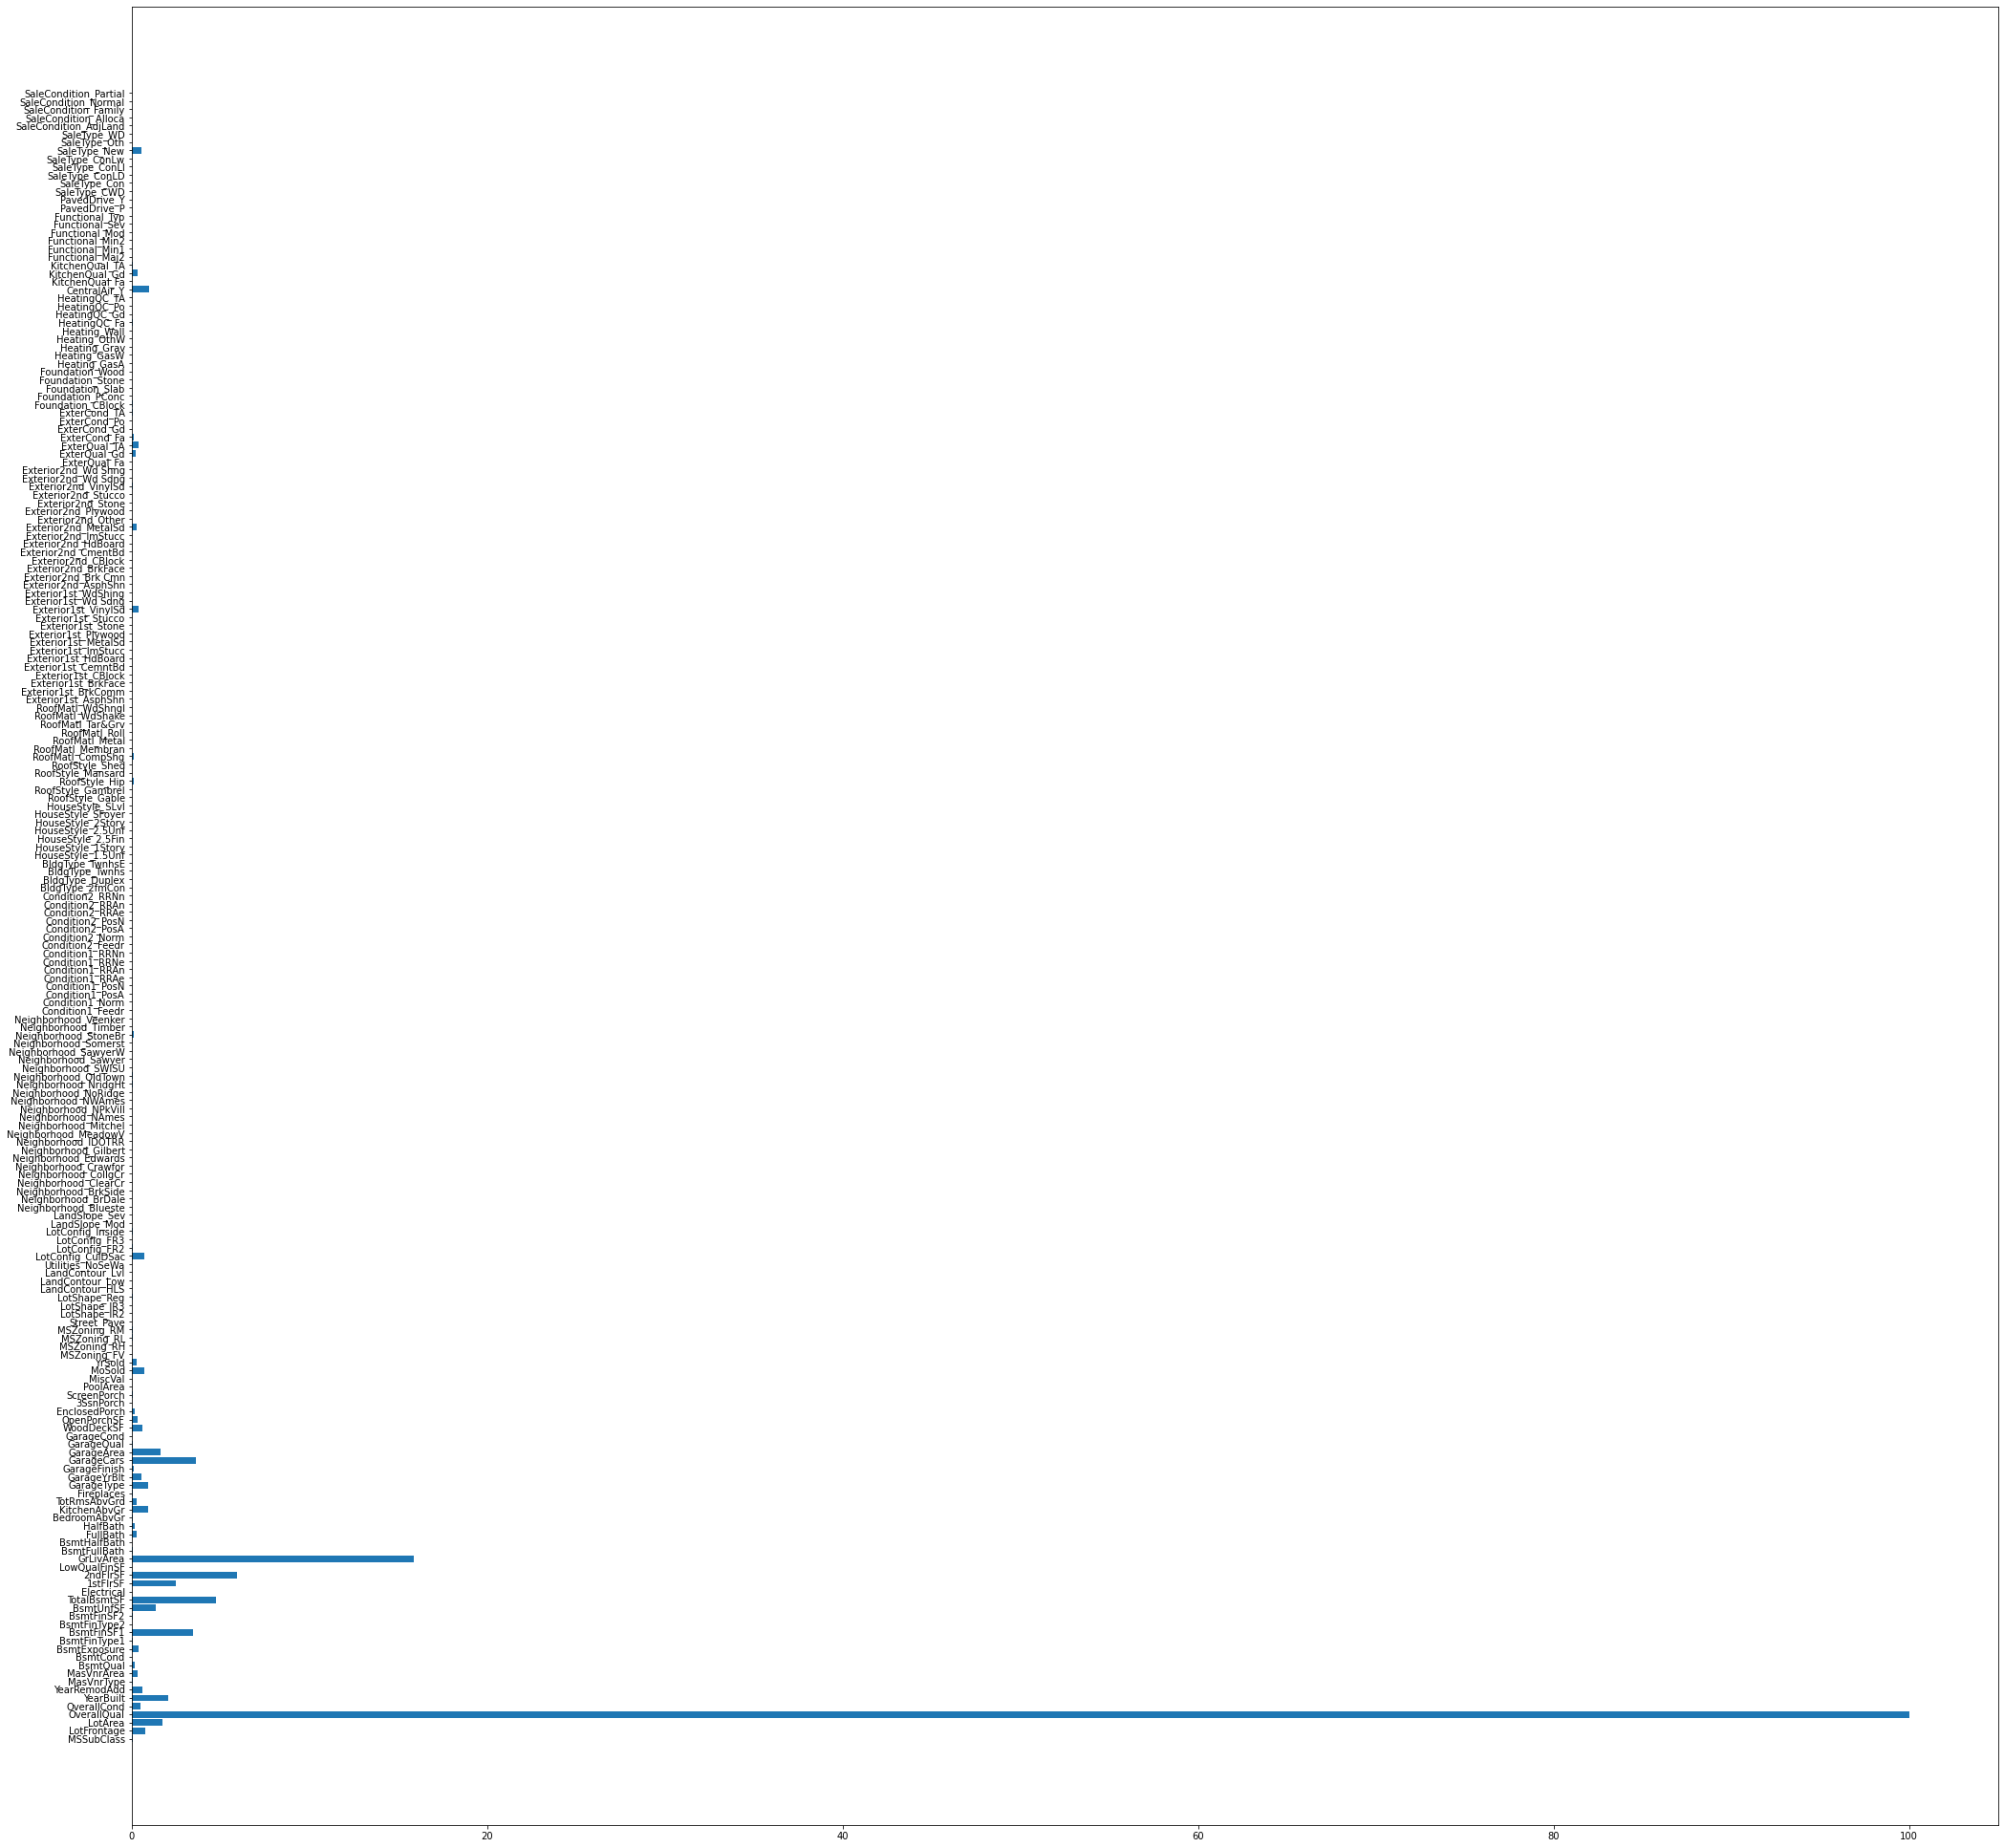

In [49]:
xx = df2.drop(['Id','SalePrice'], axis=1)
yy = df2['SalePrice']
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor()
regressor_DT.fit(xx, yy)


features = pd.DataFrame(regressor_DT.feature_importances_, xx.columns, columns=['coefficient'])
features.head()
stdevs = []
for i in xx.columns:
    stdev = df2[i].std()
    stdevs.append(stdev)
 
features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]

features['importance_normalized'] = 100*features['importance'] / features['importance'].max()
plt.figure(figsize = (35,35))
plt.barh(features.index, features.importance_normalized)

In [25]:
y = df2['SalePrice']
X = df2.drop(['Id', 'SalePrice'], inplace = False, axis = 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = np.append(arr = np.ones([X_train.shape[0], 1]).astype(int), values = X_train, axis = 1)
X_test = np.append(arr = np.ones([X_test.shape[0], 1]).astype(int), values = X_test, axis = 1)

In [28]:
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
X_opt = [x for x in range(203)]
regressor_OLS = sm.OLS(y_train, X_train[:, X_opt]).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     58.58
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:07   Log-Likelihood:                -195.03
No. Observations:                1168   AIC:                             778.1
Df Residuals:                     974   BIC:                             1760.
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.009      0.581      0.5

In [29]:
X_opt = [3,4,5,6,8,9,10,11,12,14,17,18,20,21,23,28,29,30,31,36,43,44,46,48,50,51,52,56,58,59,60,61,79,80,81,87,91,94,95,101,102,110,121,122,123,124,125,126,127,158,159,165,168,172,179,180,181,183,184,187,191,192,195,201]
regressor_OLS = sm.OLS(y_train, X_train[:, X_opt]).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     165.5
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:28   Log-Likelihood:                -305.01
No. Observations:                1168   AIC:                             738.0
Df Residuals:                    1104   BIC:                             1062.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0825      0.013      6.314      0.0

In [42]:
X_opt = [3,4,5,6,8,9,10,11,12,14,17,18,20,21,23,28,29,30,31,36,43,44,46,48,50,51,52,56,58,59,60,61,79,80,81,87,91,94,95,101,102,110,121,122,123,124,125,126,127,158,159,165,168,172,179,180,181,183,184,187,191,192,195,201]
to_remove = {8,11,15,23,26,30,39,41,53,62}
cnt = 0
for i in to_remove:
    X_opt.pop(i - cnt - 1)
    cnt += 1
print(X_opt)
regressor_OLS = sm.OLS(y_train, X_train[:, X_opt]).fit()
# print(regressor_OLS.summary())

ssss [3, 4, 5, 6, 8, 9, 10, 12, 14, 18, 20, 21, 28, 29, 30, 31, 36, 43, 44, 48, 50, 52, 56, 58, 60, 61, 79, 80, 81, 87, 91, 94, 101, 110, 121, 122, 123, 124, 125, 126, 127, 158, 159, 165, 172, 179, 180, 181, 183, 184, 187, 191, 195, 201]
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:53:12   Log-Likelihood:                -312.40
No. Observations:                1168   AIC:                             732.8
Df Residuals:                    1114   BIC:                             1006.
Df Model:                          53                                         
Covariance Type:            nonrobust              

In [31]:
X_opt = [3,4,5,6,8,9,10,11,12,14,17,18,20,21,23,28,29,30,31,36,43,44,46,48,50,51,52,56,58,59,60,61,79,80,81,87,91,94,95,101,102,110,121,122,123,124,125,126,127,158,159,165,168,172,179,180,181,183,184,187,191,192,195,201]
to_remove = {8,11,15,23,26,30,39,41,53,62}
cnt = 0
for i in to_remove:
    X_opt.pop(i - cnt - 1)
    cnt += 1
to_remove2 = {26,49,50}
cnt = 0
for i in to_remove2:
    X_opt.pop(i - cnt - 1)
    cnt += 1

regressor_OLS = sm.OLS(y_train, X_train[:, X_opt]).fit()
print(regressor_OLS.summary())

54
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:47   Log-Likelihood:                -313.71
No. Observations:                1168   AIC:                             729.4
Df Residuals:                    1117   BIC:                             987.6
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0847      0.013      6.511      

In [33]:
model = Sequential([Dense(30, activation = 'relu', input_shape = (51,)),
                    Dense(10, activation = 'relu'),
                    Dense(1, kernel_initializer = 'normal')])
model.summary()

model.compile(loss = 'mean_squared_error', optimizer = 'adam',  metrics = ['mse'])
history = (model.fit(X_train[:, X_opt], y_train, batch_size = 32, epochs = 20, validation_split = 0.2)).history

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                1560      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,881
Trainable params: 1,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 3s 8ms/step - loss: 0.9859 - mse: 0.9859 - val_loss: 1.0945 - val_mse: 1.0945
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 1.0277 - mse: 1.0277 - val_loss: 0.8215 - val_mse: 0.8215
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6769 - mse: 0.6769 - val_loss: 0.4368 - val_mse:

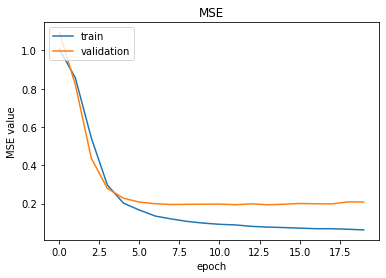

In [43]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")

In [35]:
y_pred = model.predict(X_test[:, X_opt])
test_loss = model.evaluate(X_test[:, X_opt], y_test)
print("Test Loss", test_loss[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.4812 - mse: 0.4812
Test Loss 0.4811735153198242


In [46]:
from sklearn.metrics import confusion_matrix
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)
